In [1]:
# Dealing with missing data
# create simple example data frame from a csv

import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data)) # make string file-like
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [2]:
df.isnull().sum() # number of missing values per column

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
# Eliminate samples or features with missing values

df.dropna() # drop samples (rows)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
# only drop rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [5]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# only drop rows where NaN appear in specific columns (here : 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [7]:
# Imputing missing values

# Mean imputation - replace missing value by the mean value of the entire feature column

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # axis=0 for column, axis=1 for row
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

In [8]:
# Handling categorical data
# nominal - no order
# ordinal - can be sorted

#create data frame
import pandas as pd
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [9]:
# Mapping ordinal features
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [10]:
# Inverse mapping, if you want to transfer back to string values
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [11]:
# Encoding class labels
import numpy as np
class_mapping = {label:idx for idx,label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [12]:
# map class to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [13]:
# map class back to string
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [14]:
# Alternatively, LabelEncoder
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values) # fit and transform
y

array([0, 1, 0])

In [15]:
# transform back to string representation
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [16]:
# Encode nominal feature
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [17]:
# One-hot encoding
# Create a new dummy feature for each unique value in the nominal feature column.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray() # sparse array

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [18]:
# More convenient way using pandas, convert nominal directly from string to ohe
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


In [19]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [20]:
# Partitioning dataset in training and test sets
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcainity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label'])) # 3 different types of grapes grown in different regions in italy
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcainity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
# partition using train_test_split from scikit-learn cross_validation module
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# too much information in test set, reduced learning
# too little information in test set, generalization error increases

/home/shunji/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Feature scaling
# Decision trees and random forests do not require feature scaling
# If one feature has a much bigger scale than the others, then the algorithm likely to optimize weights according
# to bigger errors in this feature

# Two common approaches:
# 1. Normalization : min-max scaling in range [0,1], xi norm = (xi - xmin) / (xmax - xmin)
# 2. Standardization : center feature columns at mean 0 and std 1, xi std = (xi - xmean) / (std dev)

In [23]:
# Normalization
# useful for bounded intervals
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [24]:
# Standardization
# Linear models initialize weights close to 0
# Standardization center feature columns at 0 with std dev of 1 (normal), making it easy to learn weights
# Maintains useful information about outliers and makes algorithm less sensitive to them
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [25]:
# Selecting meaningful features
# Overfitting - when model performs much better on training set then on test set, model has high variance
# To overcome overfitting:
# 1. Collect more training data
# 2. Introduce a penalty for complexity via regularization
# 3. Choose a simpler model with fewer parameters
# 4. Reduce the dimensionality of the data

In [26]:
# Regularized models using L1 regularization (encourages sparsity)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1) # lower c, higher regularization : C = 1/lambda
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [27]:
# lack of overfitting
lr.intercept_
# 3 values: One-vs_Rest (OvR), 
# 1st intercept = model that fits class 1 v class 2 and 3
# 2nd intercept = model that fits class 2 v class 1 and 3
# 3rd intercept = model that fits class 3 v class 1 and 2

array([-0.38378247, -0.15814699, -0.70044911])

In [28]:
lr.coef_ # one weight vector for each class

array([[ 0.27998575,  0.        ,  0.        , -0.02784819,  0.        ,
         0.        ,  0.71002163,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23682299],
       [-0.64372907, -0.06898344, -0.0571811 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92721441,
         0.05971333,  0.        , -0.37091865],
       [ 0.        ,  0.06153339,  0.        ,  0.        ,  0.        ,
         0.        , -0.63575906,  0.        ,  0.        ,  0.49794265,
        -0.35837725, -0.57156908,  0.        ]])

In [29]:
%matplotlib inline

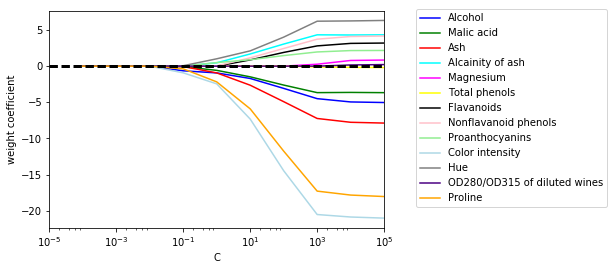

In [30]:

# Regularization path - weight coefficients of the different features for different regularization strengths:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo','orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03),
           ncol=1, fancybox=True)
plt.show()

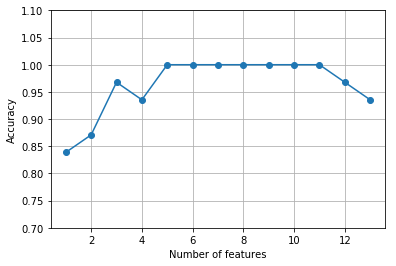

In [39]:
# Dimensionality reduction via feature selection 
# - select subset of original features
# Dimensionality reduction via feature extraction 
# - derive information from feature set to construct new feature subspce

# Sequential feature selection algorithms
# - Greedy search algorithms used to reduce initial d-dimensional feature space to k-dimensional feature subspace
#   where k < d.
# For algorithms that don't support regularization
# One such algorithm: Sequential Backward Selection (SBS):
# - removes features from the full feature subset until the new feature subspace contains the desired number 
#   of features
# - minimize criterion J to determine which feature to remove at each stage

# SBS:
# 1. Initialize the algorithm with k = d (d is the dimensionality of full feature space)
# 2. Determine the feature x- that maximizes the criterion x- = argmaxJ(X_k - x) where x in X_k
# 3. Remove x- from feature set
# 4. Terminate if k == desired number of features, else go to step 2.

# SBS (implement from scratch, similar to scikit-learn's recursive feature elimination?)

# Plot classification accuracy of different feature subsets
from sbs import SBS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train) # feed training data, sbs further splits into test(validation) and training sets
                            # to prevent original test set from becoming part of training data
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [40]:
# 5 features yielded 100% accuracy, see which features
k5 = list(sbs.subsets_[8]) # index 8 from back
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcainity of ash', 'Hue', 'Proline'], dtype='object')


In [41]:
# Evaluate performance of KNN classifier on the original test set
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))


Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [43]:
# Evaluate performance of 5-feature subset selected by SBS
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', 
     knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


In [45]:
# Assessing feature importance with random forests
# Measure feature importance as the averaged impurity decrease computed from all decision trees in the forest 
# No need to worry whether data is linearly separable

from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1) #-1 = set to number of cores
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]): # n features
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))


 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcainity of ash               0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


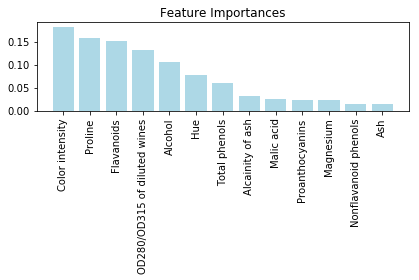

In [48]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
          rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
# feature importances sum to 1

In [59]:
# selects features based on user-specified threshold after model fitting

from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(10000)
model = SelectFromModel(model, threshold=0.15).estimator
model.fit(X_train_std, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)